In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Rescaling, Flatten, Activation
from tensorflow.keras.models import Sequential


In [2]:
image_size = (48,48)
batch_size = 32

trainingSet = tf.keras.preprocessing.image_dataset_from_directory(
    "fer_images/Training",  
    seed = 1337, 
    image_size = image_size, 
    batch_size = batch_size,
)

validationSet = tf.keras.preprocessing.image_dataset_from_directory(
    "fer_images/PrivateTest", 
    seed = 1337, 
    image_size = image_size, 
    batch_size = batch_size,
)

testSet = tf.keras.preprocessing.image_dataset_from_directory(
    "fer_images/PublicTest", 
    seed = 1337, 
    image_size = image_size, 
    batch_size = batch_size,
)



Found 28709 files belonging to 7 classes.


2022-04-09 22:40:43.115067: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


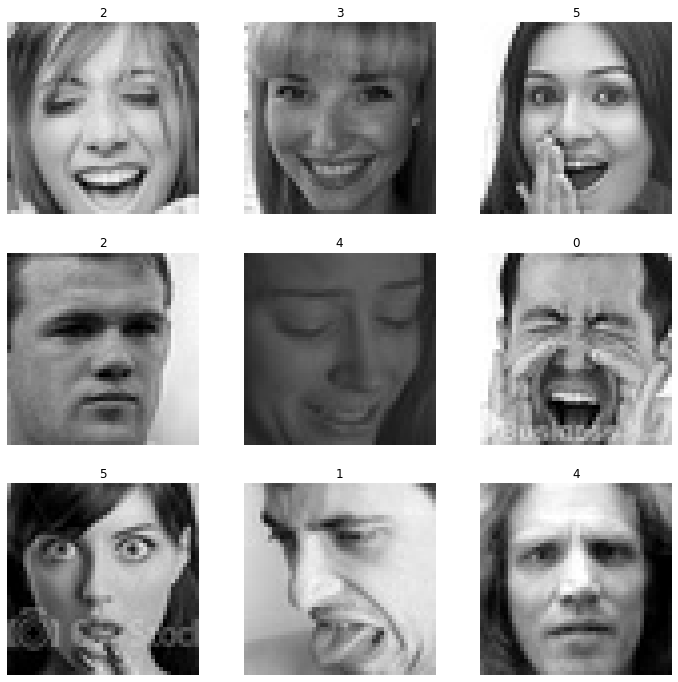

In [3]:
# %%
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in trainingSet.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

In [4]:
def my_model(input_shape, num_classes):
    model = Sequential()

    # Entry block
    model.add(Rescaling(1.0 / 255))
    model.add(Conv2D(64, (5, 5), strides=2, padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=3, strides=2))


    model.add(Conv2D(64, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=3, strides=2))

    model.add(Conv2D(128, (4,4), padding="same"))
    model.add(Activation("relu"))

    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(
        units = 3072, 
        activation = 'relu'
    ))

    model.add(Dense(7, activation='softmax'))
    epochs = 100

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    model.fit(
        trainingSet, epochs=epochs, batch_size = 16, validation_data=validationSet,
    )
    
    return model

In [5]:
model = my_model(image_size, 7)
model.save('model.h5')

Epoch 1/100
898/898 [==============================] - 98s 108ms/step - loss: 1.6637 - accuracy: 0.3335 - val_loss: 1.5256 - val_accuracy: 0.4110
Epoch 2/100
898/898 [==============================] - 101s 113ms/step - loss: 1.4988 - accuracy: 0.4164 - val_loss: 1.4163 - val_accuracy: 0.4494
Epoch 3/100
898/898 [==============================] - 101s 112ms/step - loss: 1.4158 - accuracy: 0.4498 - val_loss: 1.3722 - val_accuracy: 0.4731
Epoch 4/100
898/898 [==============================] - 103s 114ms/step - loss: 1.3539 - accuracy: 0.4757 - val_loss: 1.4172 - val_accuracy: 0.4617
Epoch 5/100
898/898 [==============================] - 102s 113ms/step - loss: 1.3018 - accuracy: 0.4990 - val_loss: 1.3277 - val_accuracy: 0.4965
Epoch 6/100
898/898 [==============================] - 99s 110ms/step - loss: 1.2500 - accuracy: 0.5222 - val_loss: 1.3143 - val_accuracy: 0.4962
Epoch 7/100
898/898 [==============================] - 99s 110ms/step - loss: 1.1978 - accuracy: 0.5395 - val_loss: 1.29